In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#IMPORT DATASET

data=pd.read_excel("C:/Users/Dell/OneDrive/Desktop/TOPS/project/telecom_customer.xlsx")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#DATA PREPROCESSING
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [8]:
data['TotalCharges'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
# DATA CLEANING

data['TotalCharges'].is_unique

False

In [10]:
data.drop('customerID',axis=1,inplace=True)

In [11]:
data['TechSupport']=data['TechSupport'].replace({'Yes':1,'No internet service':0,'No':0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_20228\1899954062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['TechSupport']=data['TechSupport'].replace({'Yes':1,'No internet service':0,'No':0})


In [12]:
data['Churn']=data['Churn'].replace({1:'Yes',0:'No'})
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,0,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,1,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,1,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,0,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,0,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,0,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data[(data['tenure'] == 0) & (data['TotalCharges'].isnull())]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,1,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,0,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,1,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,0,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,1,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
data['TotalCharges']=data['TotalCharges'].replace(" " ,0)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [16]:
data['TotalCharges'].mean()
data['TotalCharges']/data['tenure']

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Length: 7043, dtype: float64

In [17]:
data['TotalCharges'].dtypes

dtype('float64')

In [18]:
#EXPLORATORY DATA ANALYSIS


data['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Text(0.5, 1.0, 'ContractWise Churn')

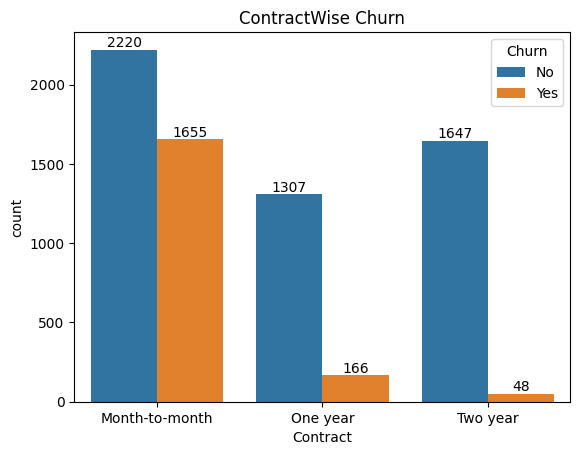

In [19]:
xz=sns.countplot(x='Contract', hue='Churn', data=data)
xz.bar_label(xz.containers[0])
xz.bar_label(xz.containers[1])

plt.title("ContractWise Churn")

In [20]:
data.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,2810,2785,3875,4171,2365,5174


In [47]:
data.columns.tolist()[5:15]


['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

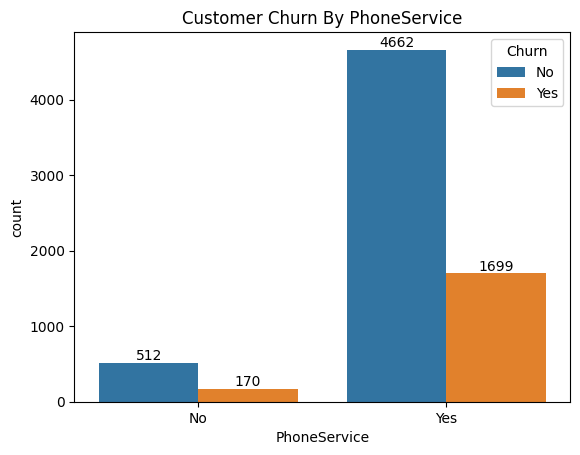

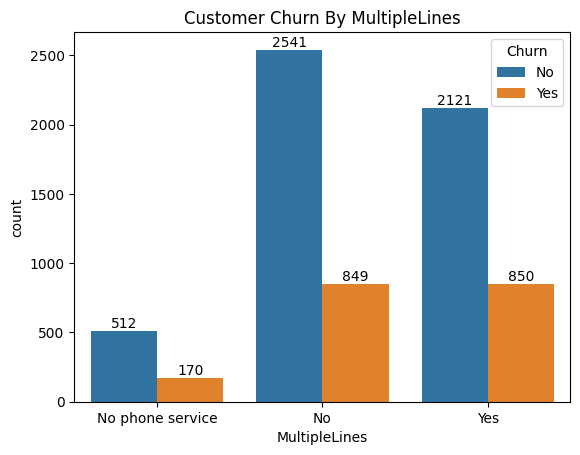

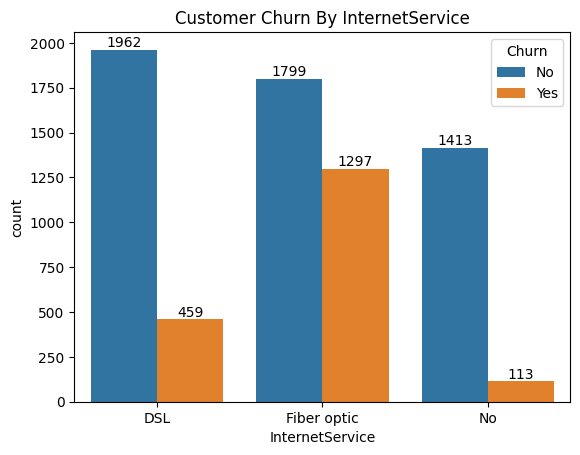

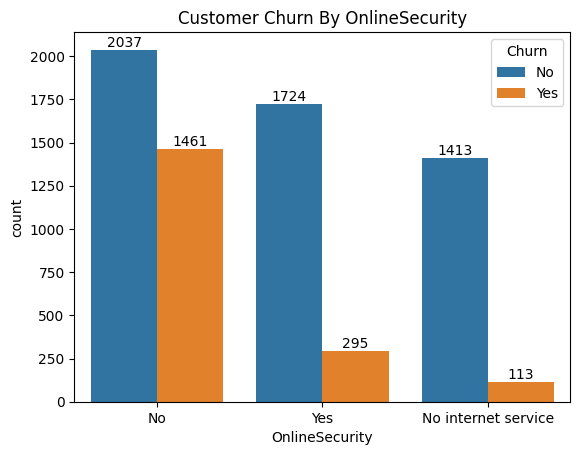

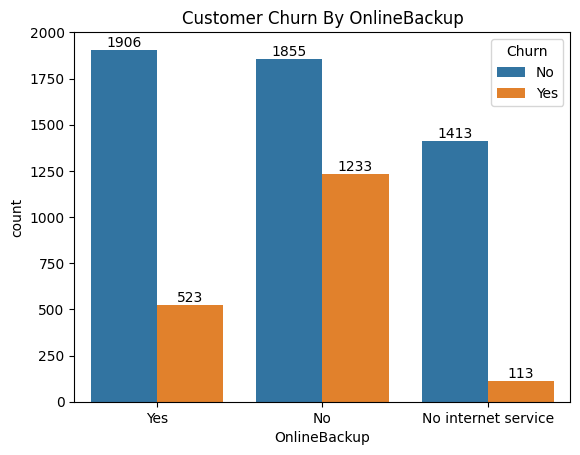

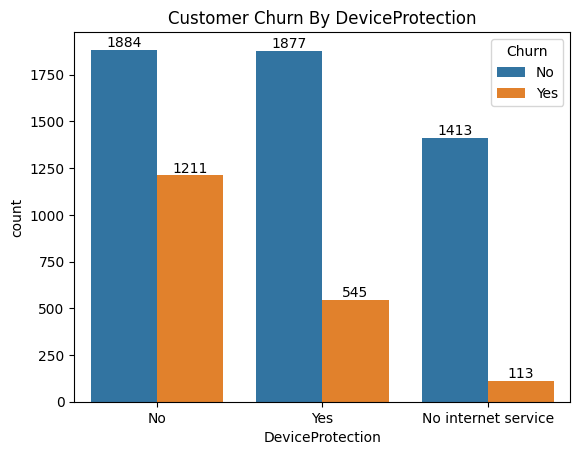

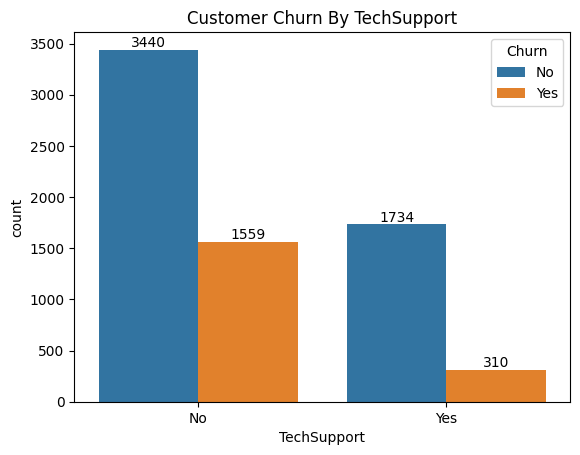

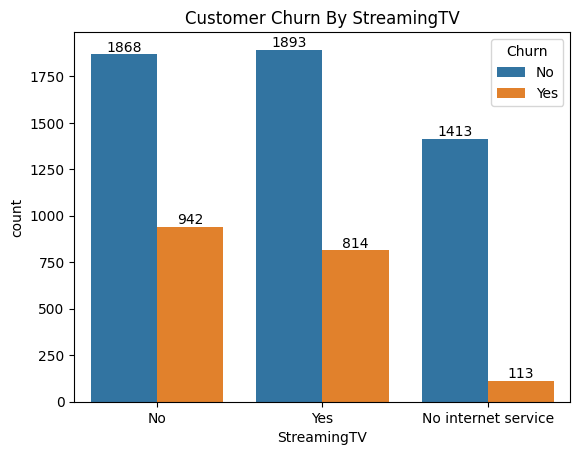

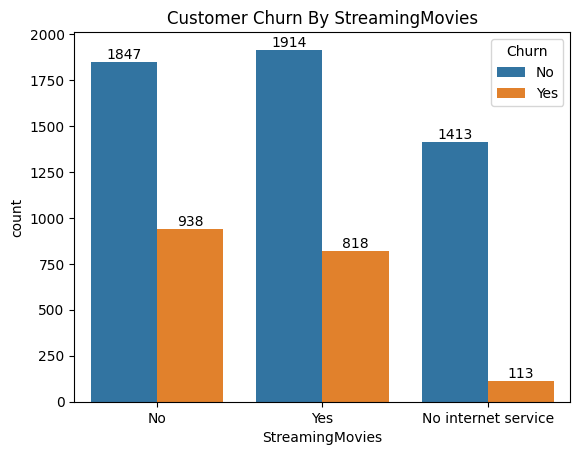

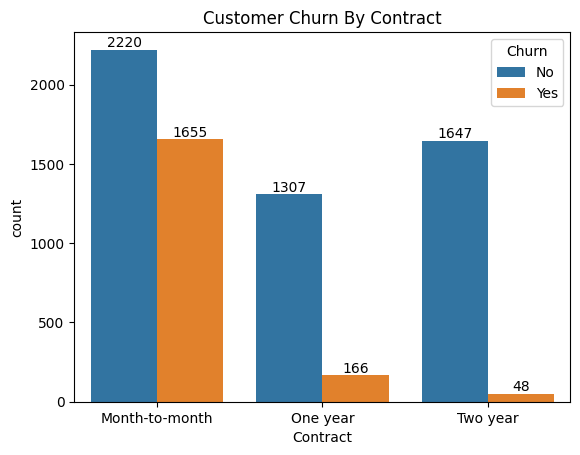

In [48]:
for col in data.columns.tolist()[5:15]:
    xy=sns.countplot(x=col,hue='Churn',data=data)
    for bars in xy.containers:
        xy.bar_label(bars)
    plt.title(f"Customer Churn By {col}")
    plt.show()

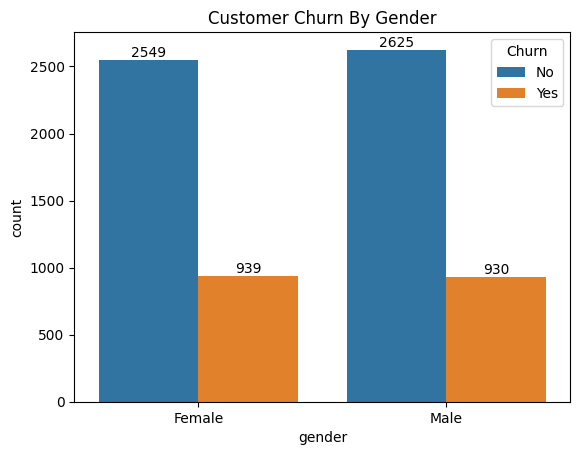

In [22]:
xy=sns.countplot(x='gender',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By Gender")
plt.show()

In [23]:
data['SeniorCitizen']=data['SeniorCitizen'].replace({1:'Sen',0:'Not_Sen'})
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Not_Sen,Yes,No,1,No,No phone service,DSL,No,Yes,No,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Not_Sen,No,No,34,Yes,No,DSL,Yes,No,Yes,0,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Not_Sen,No,No,2,Yes,No,DSL,Yes,Yes,No,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Not_Sen,No,No,45,No,No phone service,DSL,Yes,No,Yes,1,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Not_Sen,No,No,2,Yes,No,Fiber optic,No,No,No,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Not_Sen,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,1,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Not_Sen,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,0,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Not_Sen,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,0,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Sen,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,0,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


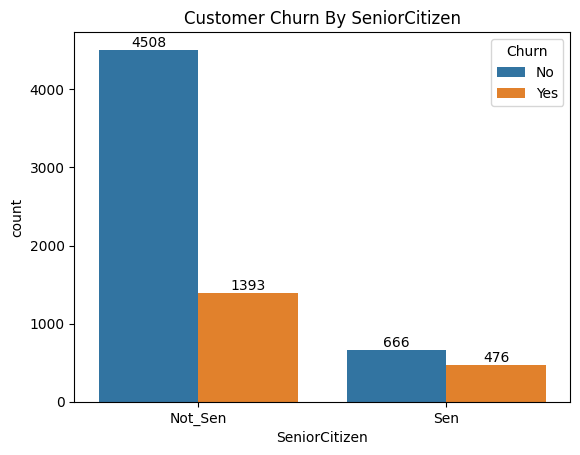

In [24]:
xy=sns.countplot(x='SeniorCitizen',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By SeniorCitizen")
plt.show()

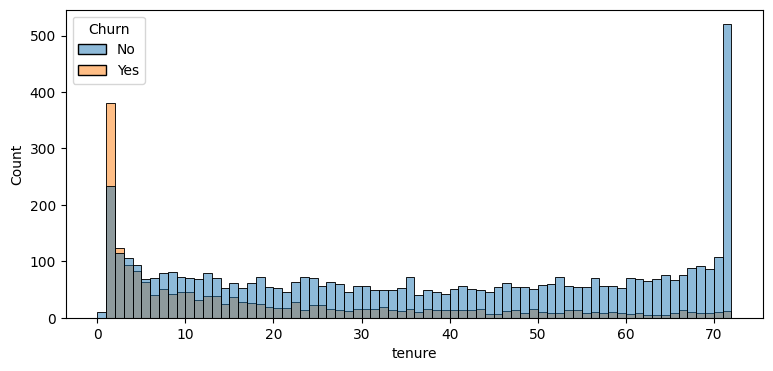

In [25]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",hue="Churn",data=data,bins=72)
plt.show()


In [26]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Not_Sen,Yes,No,1,No,No phone service,DSL,No,Yes,No,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Not_Sen,No,No,34,Yes,No,DSL,Yes,No,Yes,0,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Not_Sen,No,No,2,Yes,No,DSL,Yes,Yes,No,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Not_Sen,No,No,45,No,No phone service,DSL,Yes,No,Yes,1,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Not_Sen,No,No,2,Yes,No,Fiber optic,No,No,No,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


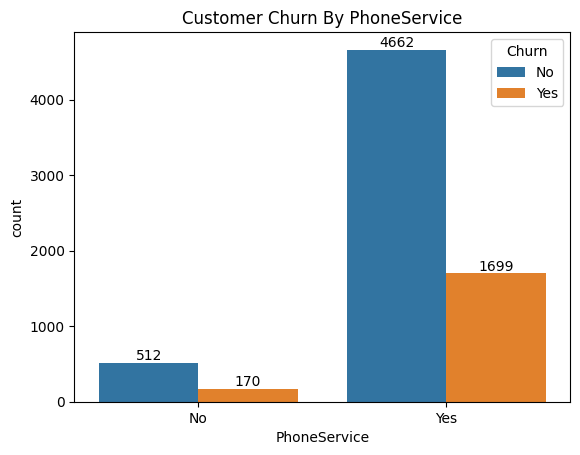

In [27]:
xy=sns.countplot(x='PhoneService',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By PhoneService")
plt.show()

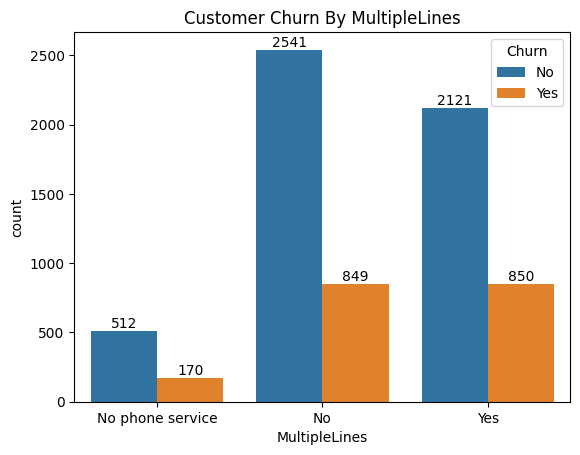

In [28]:
xy=sns.countplot(x='MultipleLines',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By MultipleLines")
plt.show()

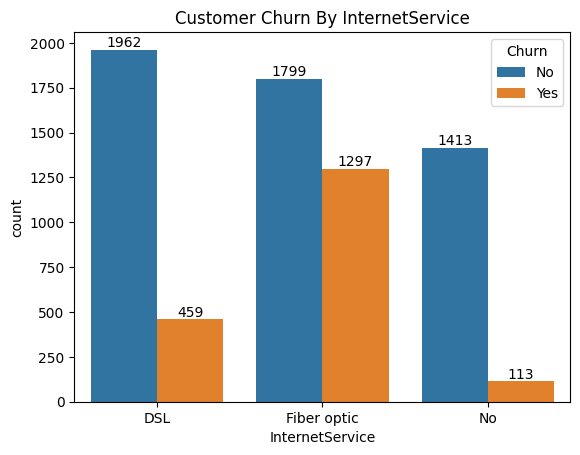

In [29]:
xy=sns.countplot(x='InternetService',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By InternetService")
plt.show()

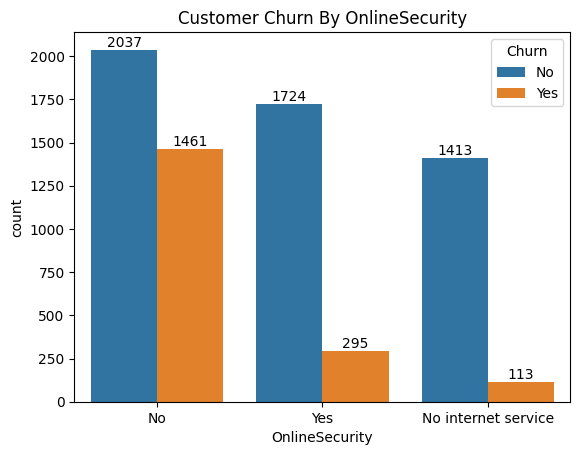

In [30]:
xy=sns.countplot(x='OnlineSecurity',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By OnlineSecurity")
plt.show()

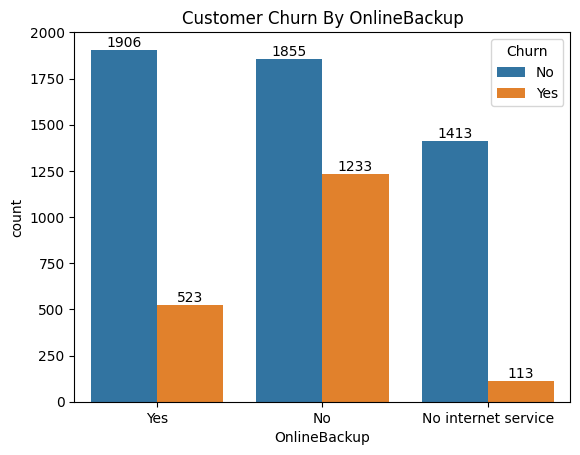

In [31]:
xy=sns.countplot(x='OnlineBackup',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By OnlineBackup")
plt.show()

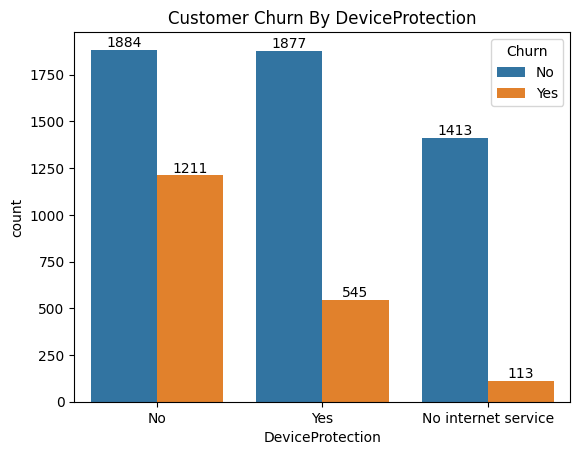

In [32]:
xy=sns.countplot(x='DeviceProtection',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By DeviceProtection")
plt.show()

In [33]:
data['TechSupport']=data['TechSupport'].replace({0:'No',1:'Yes'})

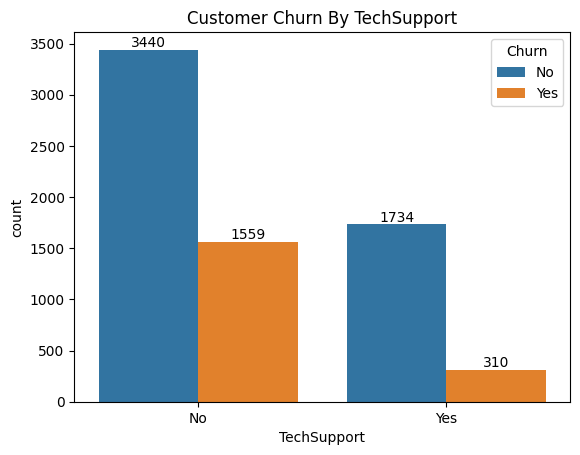

In [34]:
xy=sns.countplot(x='TechSupport',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By TechSupport")
plt.show()

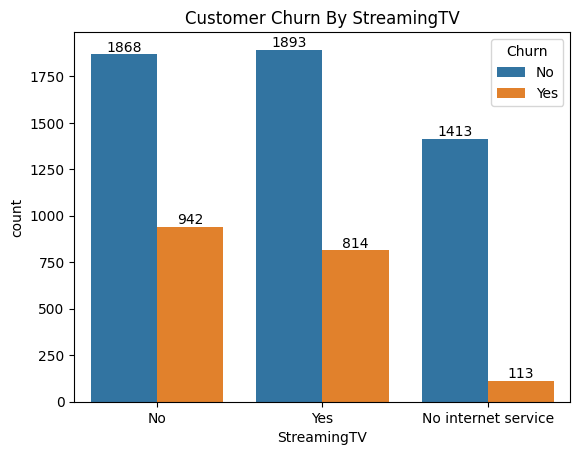

In [35]:
xy=sns.countplot(x='StreamingTV',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By StreamingTV")
plt.show()

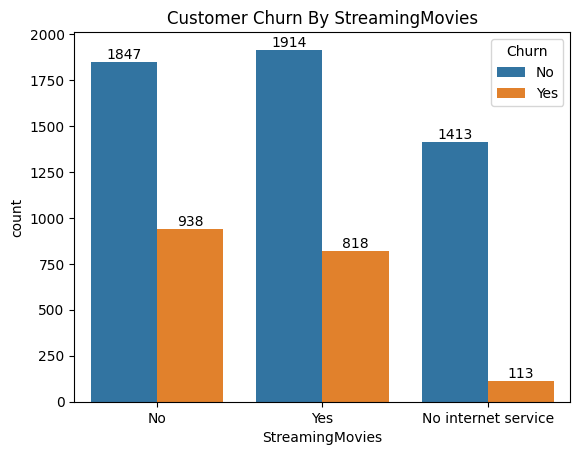

In [36]:
xy=sns.countplot(x='StreamingMovies',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By StreamingMovies")
plt.show()

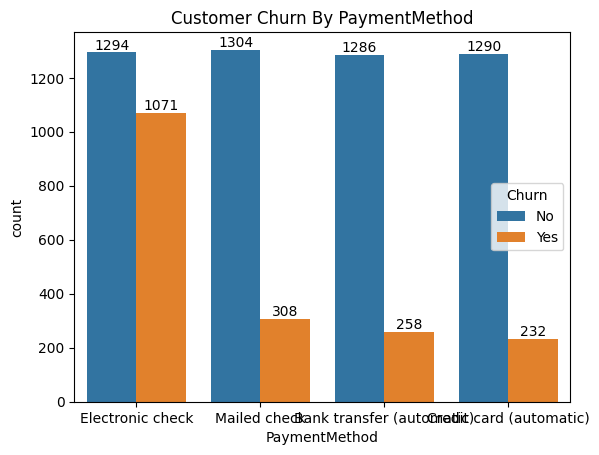

In [37]:
xy=sns.countplot(x='PaymentMethod',hue='Churn',data=data)
for bars in xy.containers:
    xy.bar_label(bars)
plt.title("Customer Churn By PaymentMethod")
plt.show()

## CONCLUSION ##
MONTH TO MONTH CHURN RATE I
SENIOR CITIZEN churn 
LOW TENURE CUSTOMERS ARE CHURNING MORE
MULTIPLE LINES PHONE SERVICE AND PHONE SERVICE WITH SINGLE LINE CHURN IS MORE
fiber optic customer churn is much higher
customer withour online security and backup churn more
customers with no tech support churn more
streaming movies and tv customer exp should be enhanced to reduce churn rate
electronic check mode of payment has highest churn 